In [135]:
%%html
<a href="https://www.kaggle.com/mlg-ulb/creditcardfraud/data#">Download the data from here</a>

In [136]:
import pandas as pd
import numpy as np
import keras as ks
import seaborn as sns
import matplotlib.pyplot as plt
# to visualise all the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

In [137]:
credit_data = pd.read_csv("C:/Users/spasula/Desktop/Credit Card/1.Data Collection/creditcard.csv")

In [138]:
credit_data.head(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,-0.371407,1.341262,0.359894,-0.358091,-0.137134,0.517617,0.401726,-0.058133,0.068653,-0.033194,0.084968,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,-0.099254,-1.416907,-0.153826,-0.751063,0.167372,0.050144,-0.443587,0.002821,-0.611987,-0.045575,-0.219633,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,1.249376,-0.619468,0.291474,1.757964,-1.323865,0.686133,-0.076127,-1.222127,-0.358222,0.324505,-0.156742,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,-0.410430,-0.705117,-0.110452,-0.286254,0.074355,-0.328783,-0.210077,-0.499768,0.118765,0.570328,0.052736,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,-0.366846,1.017614,0.836390,1.006844,-0.443523,0.150219,0.739453,-0.540980,0.476677,0.451773,0.203711,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [139]:
credit_data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [140]:
credit_data.shape

(284807, 31)

In [141]:
credit_data.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

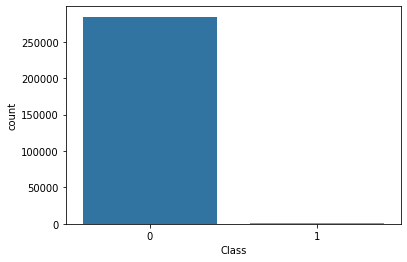

0    284315
1       492
Name: Class, dtype: int64

In [142]:
sns.countplot(x='Class',data=credit_data)
plt.show()
credit_data.Class.value_counts()

C:\Users\spasula\AppData\Local\Continuum\anaconda3\envs\pstenv\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


(0.0, 25691.16)

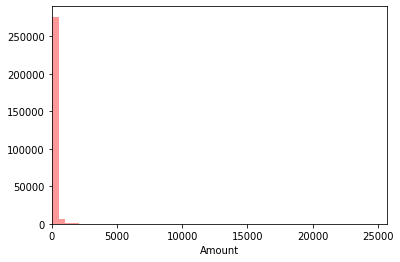

In [143]:
import math
sns.distplot(credit_data['Amount'],color='r',kde=False).set_xlim([min(credit_data['Amount']),max(credit_data['Amount'])])

(-6.907755278982137, 10.153902281764749)

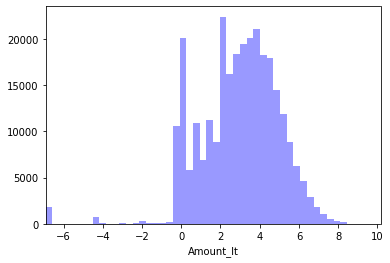

In [144]:
# Log transformation of Amount
credit_data['Amount_lt'] = credit_data['Amount'].apply(lambda x:math.log(x+0.001))
sns.distplot(credit_data['Amount_lt'],color='b',
             kde=False).set_xlim([min(credit_data['Amount_lt']),max(credit_data['Amount_lt'])])

(0.0, 47.99777777777778)

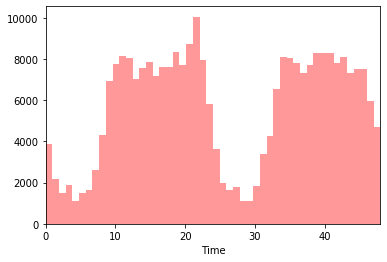

In [145]:
sns.distplot(credit_data['Time']/3600,color='r',
             kde=False).set_xlim([min(credit_data['Time']/3600),max(credit_data['Time']/3600)])

In [146]:
from sklearn.preprocessing import StandardScaler,RobustScaler
rob_scaler = RobustScaler()
credit_data['time_st'] = rob_scaler.fit_transform(credit_data['Time'].values.reshape(-1,1))
credit_data.drop(['Amount','Time'],axis=1,inplace=True)

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [148]:
x = credit_data.loc[:,credit_data.columns!='Class']
y = credit_data.loc[:,credit_data.columns=='Class']

In [149]:
over_sampling = SMOTE(random_state=123)
x_train, x_test, y_train, y_test = train_test_split(x, y.values.ravel(), test_size=0.3, random_state=123)

In [150]:
os_x,os_y = over_sampling.fit_sample(x_train,y_train)

In [151]:
np.bincount(os_y)

array([199032, 199032], dtype=int64)

In [152]:
from sklearn.feature_selection import RFE
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe = rfe.fit(os_x,os_y)
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True  True False False  True  True  True False  True
 False  True False  True  True False False  True False  True False False
  True  True False False False  True]
[ 1  2 10  1  1  5  9  1  1  1  4  1  7  1  6  1  1 15 14  1 12  1 11 16
  1  1  8  3 13  1]


In [153]:
x = os_x.iloc[:,rfe.support_]
y = os_y
import statsmodels.api as sm
logit_model = sm.Logit(y,x)
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.378854
         Iterations 11
                          Results: Logit
Model:              Logit            Pseudo R-squared: 0.453      
Dependent Variable: y                AIC:              301646.4319
Date:               2020-03-17 06:46 BIC:              301809.8474
No. Observations:   398064           Log-Likelihood:   -1.5081e+05
Df Model:           14               LL-Null:          -2.7592e+05
Df Residuals:       398049           LLR p-value:      0.0000     
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     11.0000                                       
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
V1            0.0168    0.0025     6.7508  0.0000   0.0119   0.0216
V4            0.1954    0.0029    66.2940  0.000

In [154]:
logreg.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [155]:
xtest = x_test.iloc[:,rfe.support_]

In [156]:
y_pred = logreg.predict(xtest)

In [157]:
logreg.score(xtest,y_test)

0.9739475439766863

In [158]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[83070  2213]
 [   13   147]]


In [159]:
from sklearn.model_selection import GridSearchCV
C = [0.001,0.01,0.1,1,10,100,1000]
penalty = ["l1","l2"]
solver= ['lbfgs','liblinear']
params = dict(C=C,penalty=penalty,solver=solver)
clf = GridSearchCV(logreg,params,cv=5,verbose=0)
best_model = clf.fit(x,y)
best_model.best_estimator_.get_params()

C:\Users\spasula\AppData\Local\Continuum\anaconda3\envs\pstenv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\spasula\AppData\Local\Continuum\anaconda3\envs\pstenv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\spasula\AppData\Local\Continuum\anaconda3\envs\pstenv\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs suppor

{'C': 0.01,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [160]:
logreg = LogisticRegression(C=0.01,penalty="l2",multi_class='ovr',n_jobs=1,solver='liblinear')
logreg.fit(x,y)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
                   solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [161]:
y_pred = logreg.predict(xtest)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[83098  2185]
 [   13   147]]


In [162]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85283
           1       0.06      0.92      0.12       160

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.97      0.99     85443



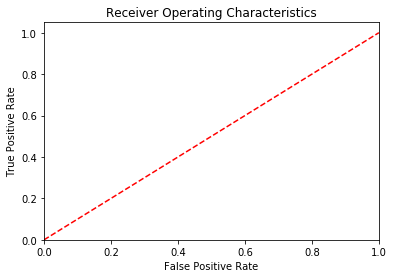

In [163]:
from sklearn.metrics import roc_auc_score,roc_curve
roccurve = roc_auc_score(y_test,logreg.predict(xtest))
fpr,tpr,thresholds = roc_curve(y_test,logreg.predict_proba(xtest)[:,1])
plt.figure()
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()